#### kosis.kr -> 범죄/안전 -> 교통사고 사망자수

#### 주야별 교통사고 - 사망자수

- 2011~2021년, 월별 차이가 있는가?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

np.set_printoptions(precision=5, suppress=True)

In [2]:
pd_data = pd.read_csv("2011_2021_주야별_교통사고_20230320214622.csv", encoding="cp949")
np_data = pd_data.to_numpy()

# print(np_data[1:, :2].shape)
# print(np_data[1:,2:].astype(np.float64).shape)

np_data = np.concatenate((np_data[1:, :2], np_data[1:,2:].astype(np.float64)), 1)

filter_d = np_data[:, 1] == '주'
filter_n = np_data[:, 1] == '야'

d_data = np_data[:,2:][filter_d]
n_data = np_data[:,2:][filter_n]

d_monthly_mean = np.mean(d_data, axis=0)
n_monthly_mean = np.mean(n_data, axis=0)

for i in range(12) :
  print(f"{i+1}월 주간 평균 : {d_monthly_mean[i]} / 야간 평균 : {n_monthly_mean[i]}\n")

1월 주간 평균 : 167.27272727272728 / 야간 평균 : 172.27272727272728

2월 주간 평균 : 133.27272727272728 / 야간 평균 : 154.27272727272728

3월 주간 평균 : 150.45454545454547 / 야간 평균 : 167.8181818181818

4월 주간 평균 : 157.54545454545453 / 야간 평균 : 174.0

5월 주간 평균 : 189.45454545454547 / 야간 평균 : 163.27272727272728

6월 주간 평균 : 171.1818181818182 / 야간 평균 : 169.36363636363637

7월 주간 평균 : 175.8181818181818 / 야간 평균 : 174.45454545454547

8월 주간 평균 : 176.1818181818182 / 야간 평균 : 178.1818181818182

9월 주간 평균 : 187.8181818181818 / 야간 평균 : 193.8181818181818

10월 주간 평균 : 207.0 / 야간 평균 : 218.72727272727272

11월 주간 평균 : 198.63636363636363 / 야간 평균 : 194.36363636363637

12월 주간 평균 : 183.72727272727272 / 야간 평균 : 186.54545454545453



In [3]:
# by statsmodels
for i in range(12) :
  x = d_data[:,i].astype(float)
  y = n_data[:,i].astype(float)

  x = sm.add_constant(x)

  model = sm.OLS(y,x)
  result = model.fit()

  # print(result.summary())
  print(result.params)

[-43.76557   1.29153]
[2.44018 1.13926]
[-44.76933   1.41297]
[-57.53876   1.46966]
[-32.09086   1.03119]
[-14.31888   1.07303]
[-39.56224   1.21726]
[-63.40312   1.37123]
[-85.97166   1.48968]
[-33.68202   1.21937]
[-121.87707    1.59206]
[-38.43804   1.22455]


In [4]:
# SSE 구하기

for i in range(12) :
  x = d_data[:,i].astype(float)
  y = n_data[:,i].astype(float)

  x = sm.add_constant(x)
  
  # print(x, x.shape)
  # print(result.params, result.params.shape)

  pred = np.sum(x * result.params, axis=1)
  # print(pred) # 예측값
  # print(y)  # 실제값

  sse = np.sum((pred-y)**2)
  print(sse)

2376.2100222460217
13550.378962434479
13654.55645120646
11613.40585876386
18478.627885304464
5917.718492860537
2675.2921391137047
3357.0101497814403
3582.6385553642444
7061.3866525463445
11262.50712553883
6633.302289266669


1.2915333072370996 -43.76557139238756
1.1392619604016336 2.4401787319277446
1.412968333479802 -44.76932653718842
1.469663224068254 -57.53876066457124
1.0311897394501994 -32.09085609220142
1.0730258382467177 -14.318877583506321
1.2172619483812341 -39.562237106300614
1.3712251356238696 -63.40311934900538
1.4896845581536589 -85.97166337685991
1.2193685588090952 -33.68201894620998
1.5920584602104448 -121.87706686907472
1.2245514274770923 -38.43803953920033


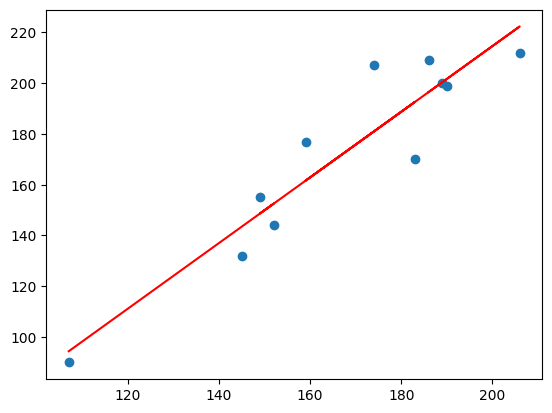

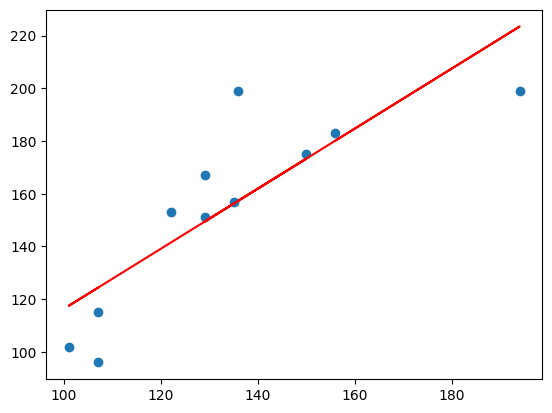

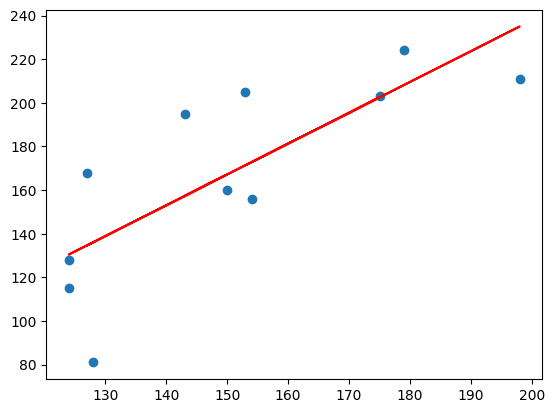

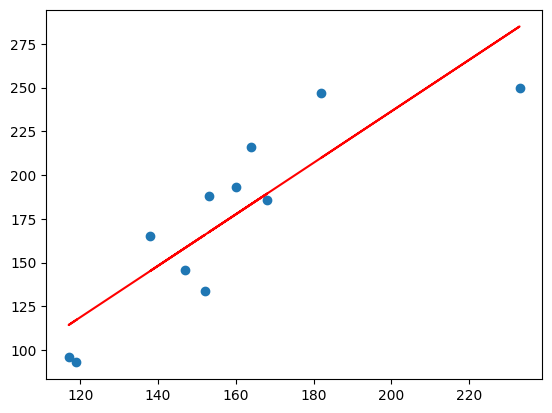

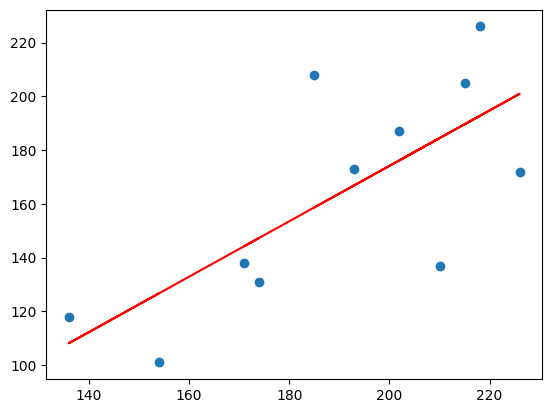

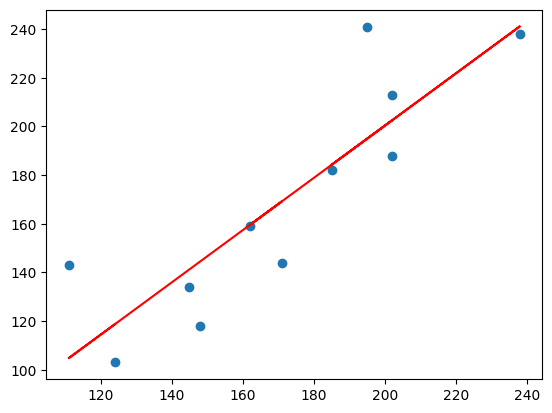

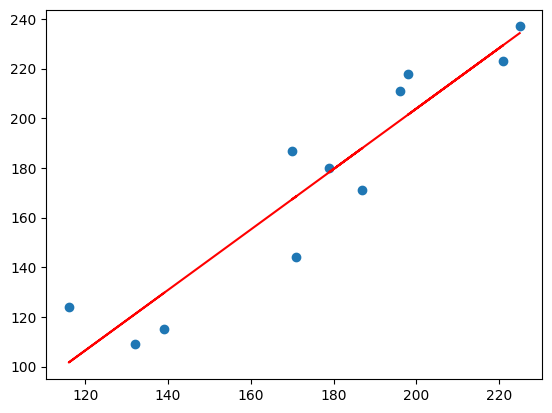

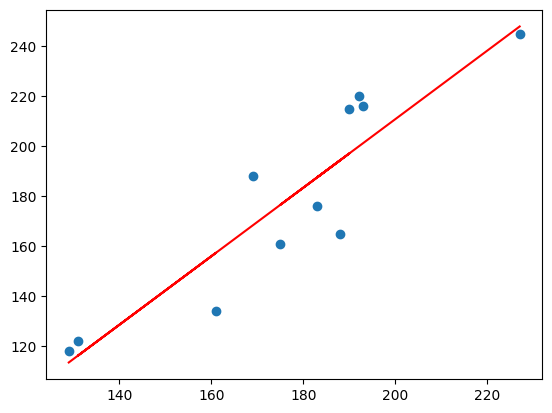

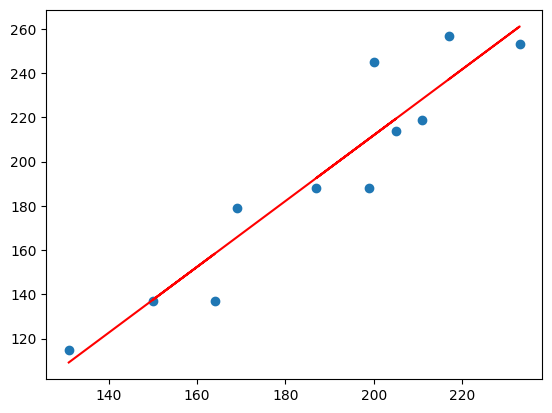

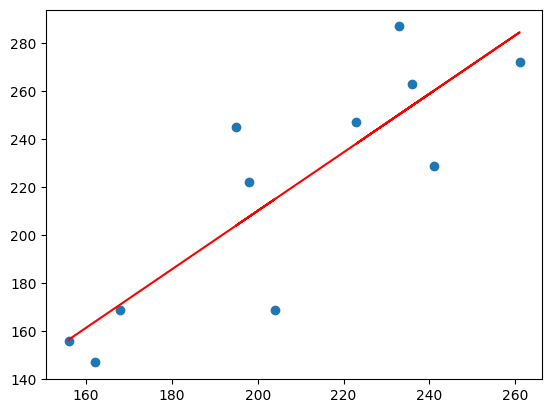

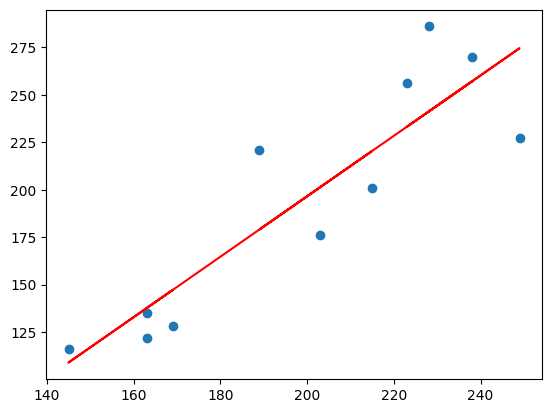

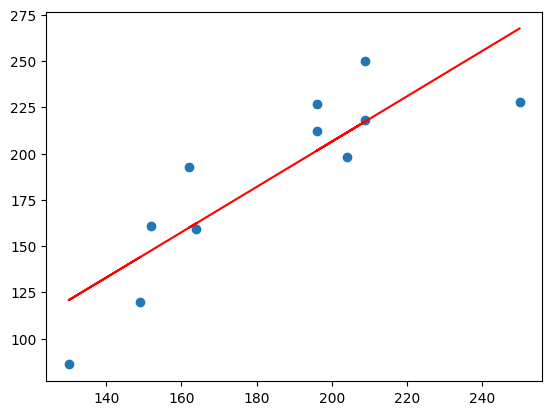

In [5]:
# plot, regression line

for i in range(12) :
  x = d_data[:,i].astype(float)
  y = n_data[:,i].astype(float)

  x_mean = np.mean(x)
  y_mean = np.mean(y)
  x_std = np.std(x)
  y_std = np.std(y)
  xy_corr = np.corrcoef(x,y)[0,1]

  slope = xy_corr*(y_std/x_std)
  intercept = y_mean - slope*x_mean

  print(slope, intercept)

  _, axe = plt.subplots()
  axe.scatter(x,y)
  axe.plot(x, x*slope+intercept, c='r')